<a href="https://colab.research.google.com/github/JustJazz291/First-Repo/blob/main/task_2_BA_FORAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/customer_booking.csv', encoding="ISO-8859-1")

In [4]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [9]:
df.isnull().sum

<bound method DataFrame.sum of        num_passengers  sales_channel  trip_type  purchase_lead  \
0               False          False      False          False   
1               False          False      False          False   
2               False          False      False          False   
3               False          False      False          False   
4               False          False      False          False   
...               ...            ...        ...            ...   
49995           False          False      False          False   
49996           False          False      False          False   
49997           False          False      False          False   
49998           False          False      False          False   
49999           False          False      False          False   

       length_of_stay  flight_hour  flight_day  route  booking_origin  \
0               False        False       False  False           False   
1               False        False       False  False           False   
2               False        False       False  False           False   
3               False        False       False  False           False   
4               False        False       False  False           False   
...               ...          ...         ...    ...             ...   
49995           False        False       False  False           False   
49996           False        False       False  False           False   
49997           False        False       False  False           False   
49998           False        False       False  False           False   
49999           False        False       False  False           False   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    False                 False                  False   
1                    False                 False                  False   
2                    False                 False                  False   
3                    False                 False                  False   
4                    False                 False                  False   
...                    ...                   ...                    ...   
49995                False                 False                  False   
49996                False                 False                  False   
49997                False                 False                  False   
49998                False                 False                  False   
49999                False                 False                  False   

       flight_duration  booking_complete  
0                False             False  
1                False             False  
2                False             False  
3                False             False  
4                False             False  
...                ...               ...  
49995            False             False  
49996            False             False  
49997            False             False  
49998            False             False  
49999            False             False  

[50000 rows x 14 columns]>

In [10]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['sales_channel', 'trip_type', 'route', 'booking_origin']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [11]:
X=df.drop('booking_complete',axis=1)
y=df['booking_complete']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
import xgboost as xgb
model=xgb.XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8536
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.52      0.12      0.19      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.55      0.56     10000
weighted avg       0.81      0.85      0.81     10000

[[8361  159]
 [1305  175]]


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

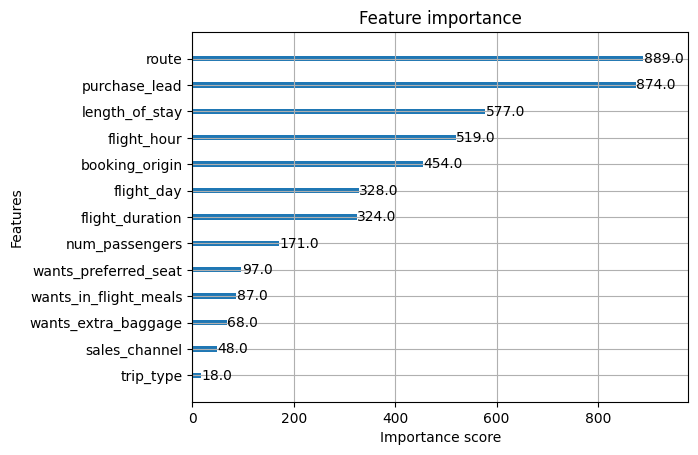

In [16]:
xgb.plot_importance(model)

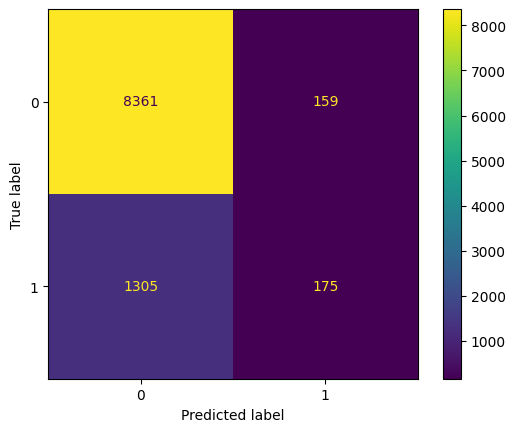

In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.52      0.12      0.19      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.55      0.56     10000
weighted avg       0.81      0.85      0.81     10000



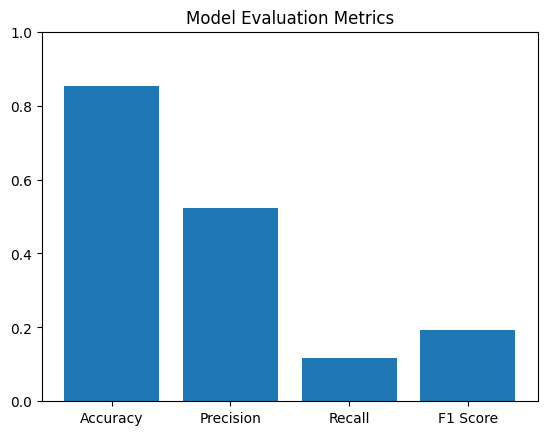

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

plt.bar(metrics.keys(), metrics.values())
plt.title("Model Evaluation Metrics")
plt.ylim(0, 1)
plt.savefig("evaluation_metrics.png")